# Atividade 03 - Classificadores Estatísticos
### Nome: Alessandro Souza Silva, matrícula: 399941

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Conjunto de Dados

#### Lendo o conjunto de dados com pandas

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Embaralhando os dados

In [3]:
data = data.sample(frac=1, random_state=42)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,2
18,5.7,3.8,1.7,0.3,1
118,7.7,2.6,6.9,2.3,3
78,6.0,2.9,4.5,1.5,2
76,6.8,2.8,4.8,1.4,2


#### Separando o conjunto de dados em 60% para treino e 40% para teste

In [4]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,stratify=Y,random_state=42)

## Implementações

#### Discriminante Quadrático Gaussiano

In [6]:
class DiscQuadraticoGaussiano(object):
    def __init__(self):
        pass
    
    def fit(self,x_train,y_train):
        
        self.classes = []
        self.prob_class = {}
        self.mean_class = {}
        self.matrix_class = {}
        
        N = len(y_train)
        
        for c in np.unique(y_train):
            
            self.classes.append(c)
            
            index_c = np.where( y_train == c )[0]
            nc = len(index_c)
            xc = x_train[index_c]
            
            prob = nc/N
            self.prob_class[c] = prob
            
            mean = np.mean(xc,axis=0)
            self.mean_class[c] = mean
            
            self.matrix_class[c] = np.cov(xc.T)
        
    def predict(self,x_test):
        
        y_predict = []
        m = x_test.shape[1]
        
        for x in x_test:
            
            prob = 0
            class_x = None
            
            for c in self.classes:
                pxc_1 = np.linalg.det(self.matrix_class[c])
                pxc_1 = np.sqrt(pxc_1) * ((2*math.pi)**(m/2))
                pxc_1 = 1/pxc_1
                
                pxc_2 = np.dot((x-self.mean_class[c]).T,np.linalg.inv(self.matrix_class[c]))
                pxc_2 = (-0.5) * np.dot(pxc_2,(x-self.mean_class[c]))
                pxc_2 = math.exp(pxc_2)
                
                pxc = pxc_1*pxc_2
                
                pcx = pxc*self.prob_class[c]
                
                if pcx > prob:
                    prob = pcx
                    class_x = c
                
            y_predict.append(class_x)
        return np.array(y_predict)

#### Naive Bayes Gaussiano

In [7]:
class NaiveBayesGaussiano(object):
    def __init__(self):
        pass
    
    def fit(self,x_train,y_train):
        
        self.classes = []
        self.prob_class = {}
        self.mean_class = {}
        self.matrix_class = {}
        
        N = len(y_train)
        
        for c in np.unique(y_train):
            
            self.classes.append(c)
            
            index_c = np.where( y_train == c )[0]
            nc = len(index_c)
            xc = x_train[index_c]
            
            prob = nc/N
            self.prob_class[c] = prob
            
            mean = np.mean(xc,axis=0)
            self.mean_class[c] = mean
            
            #----Diferença------
            matrix_cov = np.cov(xc.T)
            diagonal_values = list(matrix_cov.diagonal())
            matrix_nb = np.zeros(matrix_cov.shape)
            np.fill_diagonal(matrix_nb,diagonal_values)
            
            self.matrix_class[c] = matrix_nb
            #-------------------
        
    def predict(self,x_test):
        
        y_predict = []
        m = x_test.shape[1]
        
        for x in x_test:
            
            prob = 0
            class_x = None
            
            for c in self.classes:
                pxc_1 = np.linalg.det(self.matrix_class[c])
                pxc_1 = np.sqrt(pxc_1) * ((2*math.pi)**(m/2))
                pxc_1 = 1/pxc_1
                
                pxc_2 = np.dot((x-self.mean_class[c]).T,np.linalg.inv(self.matrix_class[c]))
                pxc_2 = (-0.5) * np.dot(pxc_2,(x-self.mean_class[c]))
                pxc_2 = math.exp(pxc_2)
                
                pxc = pxc_1*pxc_2
                
                pcx = pxc*self.prob_class[c]
                
                if pcx > prob:
                    prob = pcx
                    class_x = c
                
            y_predict.append(class_x)
        return np.array(y_predict)

#### Função para exibir a Matriz de Confusão

In [8]:
def plot_confusion_matrix(x, y, clf):
    
    y_predict = clf.predict(x)
    matrix = pd.crosstab(y,y_predict)
    l = len(matrix.columns)
    
    plt.figure(figsize=(10,8))
    plt.matshow(matrix, cmap=plt.cm.Blues,fignum=1)
    plt.colorbar()
    
    tick_marks = np.arange(l)
    plt.xticks(tick_marks, matrix.columns,fontsize=12,rotation=-45,color="blue")
    plt.yticks(tick_marks, matrix.index,fontsize=12,rotation=-45,color="blue")
    
    for (i, j), z in np.ndenumerate(matrix):
        plt.text(j, i, z, ha='center', va='center',fontsize=12)
    
    plt.xlabel("Predicted Label",fontsize=18)
    plt.ylabel("True Label",fontsize=18)

#### Função para exibir o Gráfico de Dispersão

In [9]:
def plot_boundaries(x, y, clf):
    
    x1_min, x1_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    x2_min, x2_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = .02 
    
    x1x, x2x = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = clf.predict(np.c_[x1x.ravel(), x2x.ravel()])
    
    Z = Z.reshape(x1x.shape)
    plt.figure(1, figsize=(8, 8))
    plt.pcolormesh(x1x, x2x, Z, cmap=plt.cm.Spectral)
    
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral, s=100)
    plt.xlabel('Sepal length',fontsize=18)
    plt.ylabel('Sepal width',fontsize=18)

    plt.xlim(x1x.min(), x1x.max())
    plt.ylim(x2x.min(), x2x.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

## Relatório

#### Criando os modelos

In [10]:
discr = DiscQuadraticoGaussiano()
naive = NaiveBayesGaussiano()
logis = LogisticRegression()

#### Discriminante Quadrático Gaussiano

In [11]:
#  a-A porcentagem de predições corretas para o conjunto de treino

discr.fit(x_train,y_train)

y_predict = discr.predict(x_test)

accuracy_score(y_test,y_predict)

0.9833333333333333

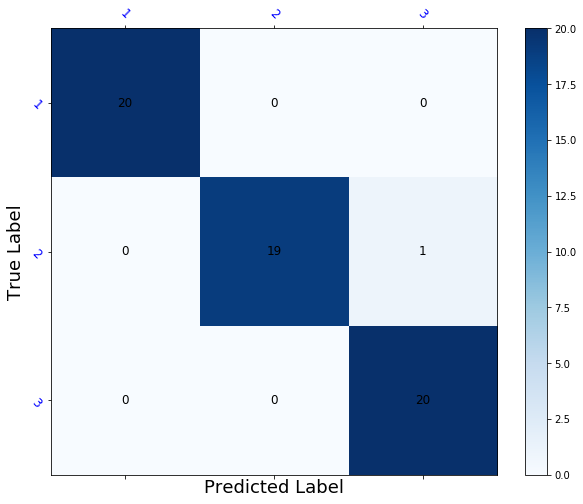

In [12]:
#  b-Matriz de Confusão
plot_confusion_matrix(x_test,y_test,discr)

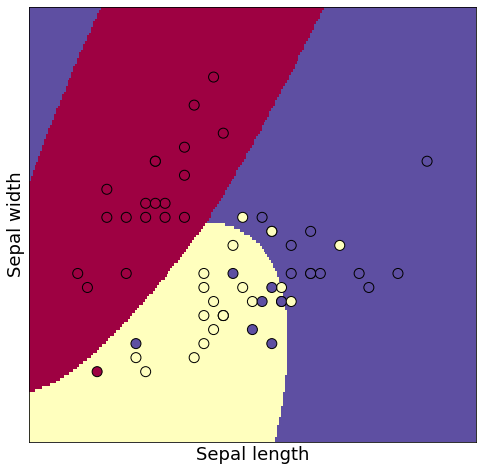

In [13]:
#  c-O dado em um gráfico de dispersão com as fronteiras de separação

discr.fit(x_train[:,:2],y_train)
plot_boundaries(x_test,y_test,discr)

#### Naive Bayes Gaussiano

In [14]:
#  a-A porcentagem de predições corretas para o conjunto de treino

naive.fit(x_train,y_train)

y_predict = naive.predict(x_test)

accuracy_score(y_test,y_predict)

0.9333333333333333

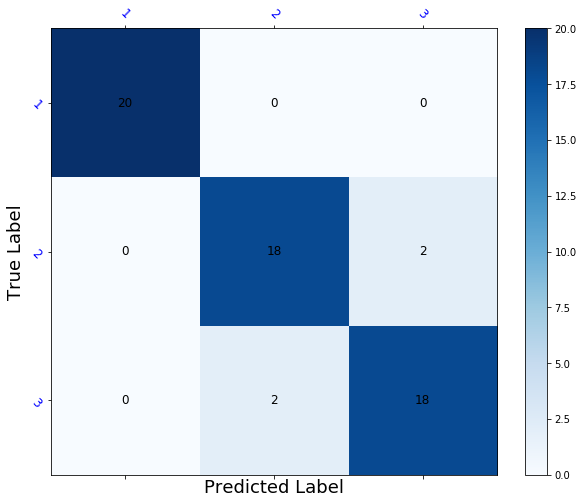

In [15]:
#  b-Matriz de Confusão
plot_confusion_matrix(x_test,y_test,naive)

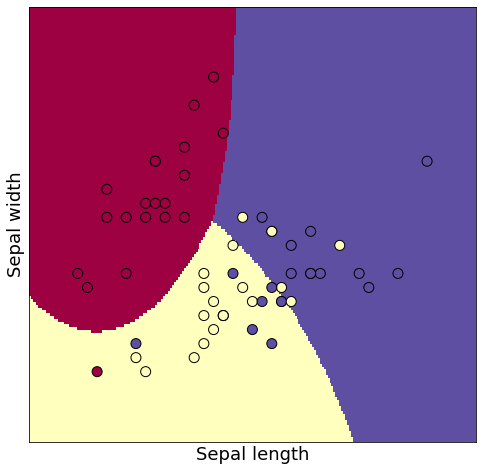

In [16]:
#  c-O dado em um gráfico de dispersão com as fronteiras de separação

naive.fit(x_train[:,:2],y_train)
plot_boundaries(x_test,y_test,naive)

#### Regressão Logística

In [17]:
#  a-A porcentagem de predições corretas para o conjunto de treino

logis.fit(x_train,y_train)

y_predict = logis.predict(x_test)

accuracy_score(y_test,y_predict)

0.95

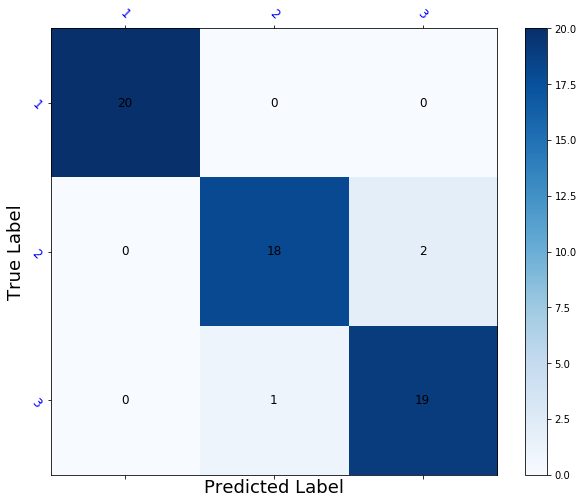

In [18]:
#  b-Matriz de Confusão
plot_confusion_matrix(x_test,y_test,logis)

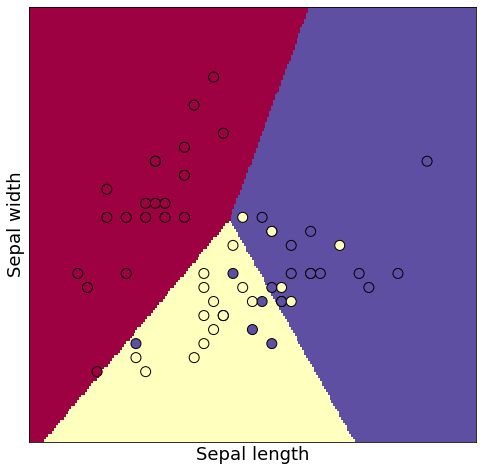

In [19]:
#  c-O dado em um gráfico de dispersão com as fronteiras de separação

logis.fit(x_train[:,:2],y_train)
plot_boundaries(x_test,y_test,logis)

#### Quais dos métodos produziu fronteiras lineares?

A regressão logística produziu fronteiras mais lineares, comparado com os outros dois modelos.

#### O dado parece se linearmente separável ou não?

Diria que parcialmente. Os dados da classe (1) se mostraram ser linearmente separáveis dos dados das demais classes. Por isso os modelos conseguiram acertar a classe de 100% dos dados da classe (1) e confundiram os dados das classes (2) e (3).